In [1]:
import os, sys
from pathlib import Path
script_dir = Path(os.path.dirname(os.path.abspath('')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
print(module_dir)

# import the rest of the modules
%matplotlib nbagg
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
import arch
import time  
import sim
import warnings
DTYPE = 'float32'
warnings.filterwarnings('ignore')

C:\Users\pinak\Documents\GitHub\fp-solvers


In [73]:
def mu3(X, alpha=10., beta=8/3., rho=28.):
    x, y, z = X[0], X[1], X[2]
    p = alpha * (y - x) 
    q = x * (rho - z) - y 
    r = x * y - beta * z
    return np.array([p, q, r], dtype=DTYPE)

def mu4(X, b=0.2):
    x, y, z = X[0], X[1], X[2]
    p = np.sin(y) - b*x 
    q = np.sin(z) - b*y 
    r = np.sin(x) - b*z
    return np.array([p, q, r], dtype=DTYPE)

mus = [mu3, mu4]
root2 = np.sqrt(2., dtype=DTYPE)
sigmas = [10., root2]
X0s = [(0., 1., 1.05), (1, 1.5, 1)]

In [74]:
n_particles = int(1e4)
n_steps = 1000000
dt = 0.01
Xs = []

for i in [0, 1]:
    X = np.empty((n_steps + 1, 3))  # Need one more for the initial values
    X[0] = X0s[i]
#     dW = np.random.normal(scale=np.sqrt(dt, dtype=DTYPE), size=(n_steps, n_particles, 3))
    for step in range(n_steps):
        X[step+1] = X[step] + mus[i](X[step]) * dt #+ sigmas[i] * dW[step]
    Xs.append(X)

<IPython.core.display.Javascript object>


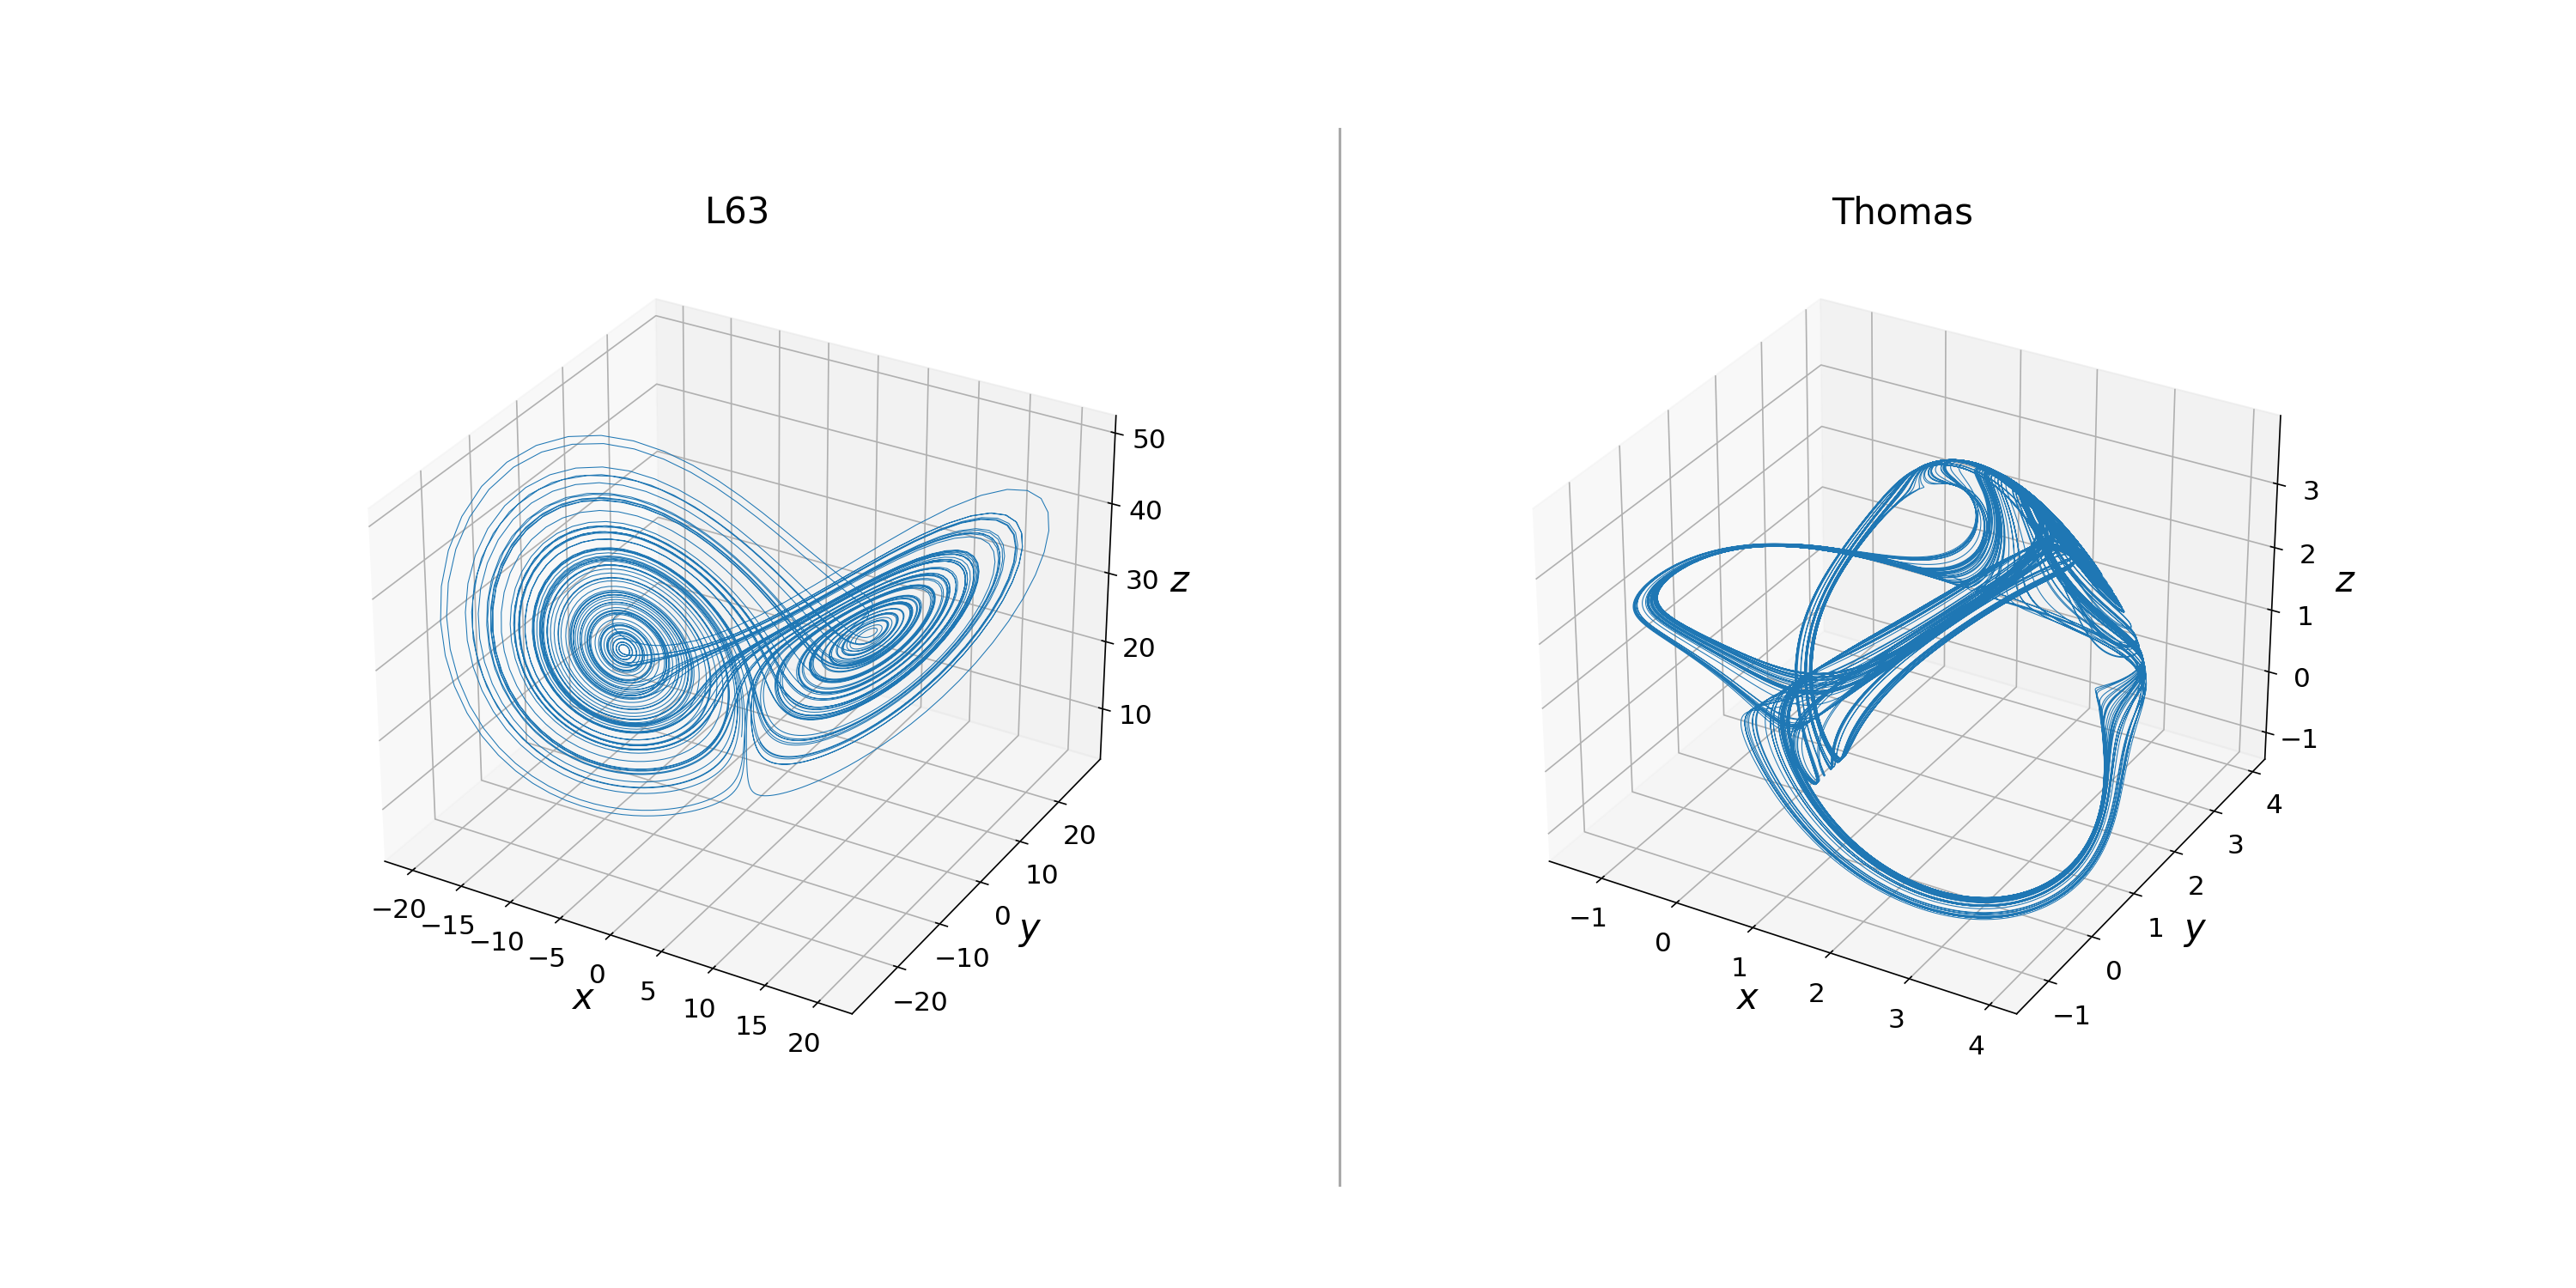

In [86]:
# set up plotting parameters
scale = 5
xlabel_size = ylabel_size = 15 + scale
tick_size = 10 + scale
legend_size = 15 + scale
title_size = 15 + scale
cbar_tick_size = 10 + scale
line_color = "darkgrey"

# define 6 subplots
fig_all = plt.figure(figsize=(20, 10))
ax_1l = fig_all.add_subplot(121, projection='3d') 
ax_1m = fig_all.add_subplot(122, projection='3d')



# set label size
ax_1l.tick_params(axis='both', which='major', labelsize=tick_size)
ax_1l.tick_params(axis='both', which='minor', labelsize=tick_size)
ax_1m.tick_params(axis='both', which='major', labelsize=tick_size)
ax_1m.tick_params(axis='both', which='minor', labelsize=tick_size)


# write titles and labels
ax_1l.set_title('L63', fontsize=title_size)
ax_1l.set_xlabel(r'$x$', fontsize=xlabel_size)
ax_1l.set_ylabel(r'$y$', fontsize=ylabel_size)
ax_1l.set_zlabel(r'$z$', fontsize=ylabel_size)
ax_1m.set_title('Thomas', fontsize=title_size)
ax_1m.set_xlabel(r'$x$', fontsize=xlabel_size)
ax_1m.set_ylabel(r'$y$', fontsize=ylabel_size)
ax_1m.set_zlabel(r'$z$', fontsize=ylabel_size)


t=10000

X = Xs[0][-t:]
ax_1l.plot(*X.T, lw=0.5)
ax_1l.set_aspect("auto")


X = Xs[1][700000:]
ax_1m.plot(*X.T, lw=0.5)
ax_1m.set_aspect("auto")

# plot and save
fig_all.subplots_adjust(wspace=0.4, hspace=0.2)
# Get the bounding boxes of the axes including text decorations
x = 0.475
line = plt.Line2D([x+.045,x+.045],[0.08,0.9], transform=fig_all.transFigure, color=line_color)
fig_all.add_artist(line)
# plt.tight_layout()
plt.savefig('../plots/attractor.png')